# Introduction to Histogram, Pixel Intensity Transformation, Thresholding, and Simple Sigmentation 

## Import Library

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

## Read Image and Displying It

In [3]:
goldhill=cv2.imread("goldhill.bmp", cv2.IMREAD_GRAYSCALE)

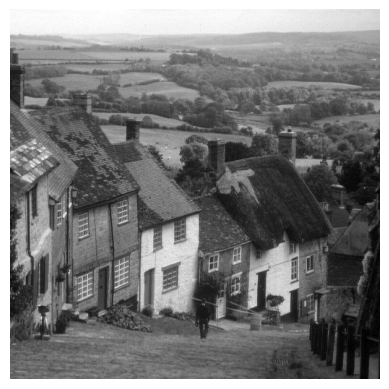

In [7]:
plt.imshow(goldhill, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [10]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()


## Plot Histogram For Gray Scale Image:

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use <code>cv.calcHist()</code> to generate the histogram. Here are the parameter values:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for this course it will always be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code>   
</p>
For real images, <code>L</code> is <code>256</code>.

In [11]:
hist=cv2.calcHist([goldhill], [0], None , [256],[0,255])


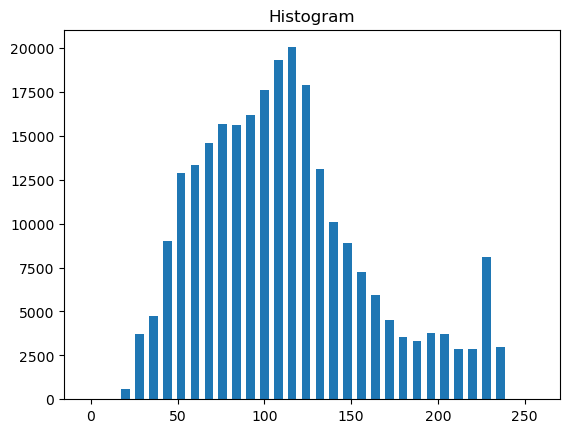

In [14]:
intensity_values_pixels=np.array([c for c in range(hist.shape[0])])
plt.bar(intensity_values_pixels, hist[:,0], width=5)
plt.title('Histogram')
plt.show()

## Intensity Transformation:

It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


### Image Negative:

Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \mbox{and} \qquad s=255-r
$$

### Brightness and Contrast Adjestment
We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.

    - Rather than implementing via array operations, we use the function  <code>convertScaleAbs</code>. 
    It scales, calculates   absolute values, and converts the result to 8-bit so the values fall between $[0,255]$. 
    For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100


In [23]:
neg_gold_hill=100-goldhill # value to be less will be more bright 

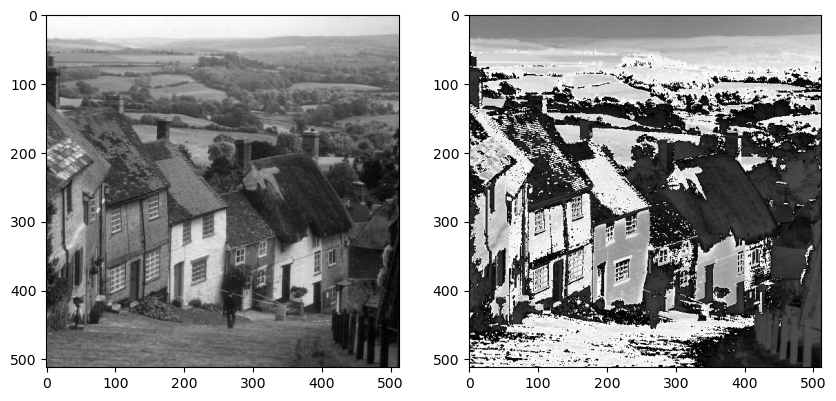

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(goldhill , cmap='grey')
plt.subplot(1,2,2)
plt.imshow(neg_gold_hill, cmap='grey')
plt.show()


In [25]:
#linear transformation with absolute value
alpha=2 
beta=200 
image_linear_transform=cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

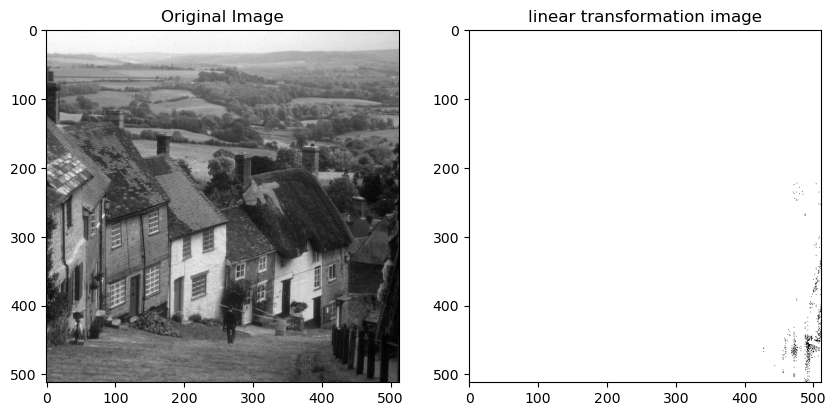

In [27]:
#show the transformation image in comarison of linear transformation image 
plot_image(goldhill,image_linear_transform, title_1="Original Image", title_2="linear transformation image")

## Histogram Equalization:
Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting  the histogram. We simply apply the function <code>cv2.equalizeHist</code



In [29]:
new_image_equalization=cv2.equalizeHist(goldhill)

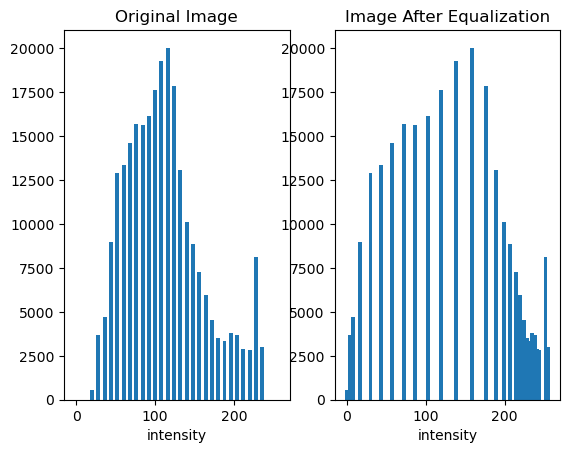

In [30]:
#Plot the histogram before and after the equalization
plot_hist(goldhill, new_image_equalization, "Original Image", "Image After Equalization")


## Thresholding and Simple Segmentation:
Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging. Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:

In [32]:
def thresholding(input_image, threshold, max_value , min_value):
    N, M=input_image.shape
    image_out=np.zeros((N,M), dtype=np.uint8)

    for i in range(N):
        for j in range (M):
            if input_image[i,j]>threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
        return image_out 

In [33]:
goldhill

array([[228, 228, 236, ..., 204, 196, 204],
       [228, 228, 228, ..., 196, 204, 196],
       [228, 236, 236, ..., 196, 204, 196],
       ...,
       [100, 108, 108, ...,  68,  44,  28],
       [100, 116, 108, ...,  68,  36,  28],
       [116, 116, 116, ...,  76,  44,  28]], dtype=uint8)

#  Geometric Transformations:
 Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.

## Scaling:

We can resize an image using the function `resize()` from `cv2` module for this purpose. 

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis

The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


We can scale the horizontal axis by two and leave the vertical axis as is:

In the same manner, we can scale the vertical axis by two:

We can scale the horizontal axis and vertical axis by two.

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:

We can  also specify the number of rows and columns:

## Translation:

Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image. 

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:

We can shift the image horizontally:

## Rotation
We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.

<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>

We can rotate our toy image by 45 degrees: